<a href="https://colab.research.google.com/github/duchaba/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Augmentation with Python, Chapter 9

## 🌻 Welcome to Chapter 7, "tabular Augmentation"


There will be a slight departure from the image, text, and audio augmentation format. We will spend more time in Python code studying the real-world tabular dataset, and in particular, in this chapter, we will cover the following topics: 

- Tabular augmentation libraries 

- Real-world tabular datasets 

- Explore and visualize tabular data 

- Transforming augmentation 

- Interacting augmentation 

- Extracting augmentation 

- ✋ STOP: You must set up Kaggle username and app Key in below step.

# Load Notebook


- This Notebook original link is: 
  - https://github.com/PacktPublishing/Data-Augmentation-with-Python/blob/main/data_augmentation_with_python_chapter_9.ipynb

# GitHub Clone

In [1]:
# git version should be 2.17.1 or higher
!git --version

git version 2.25.1


In [2]:
url = 'https://github.com/PacktPublishing/Data-Augmentation-with-Python'
# url = 'https://github.com/duchaba/Data-Augmentation-with-Python'
!git clone {url}

Cloning into 'Data-Augmentation-with-Python'...
remote: Enumerating objects: 58, done.
remote: Counting objects: 100% (36/36), done.
remote: Compressing objects: 100% (31/31), done.
remote: Total 58 (delta 21), reused 15 (delta 5), pack-reused 22
Unpacking objects: 100% (58/58), 4.23 MiB | 6.28 MiB/s, done.


## Fetch file from URL (Optional)

- Uncommend the below 2 code cells if you want to use URL and not Git Clone

In [3]:
# import requests
# #
# def fetch_file(url, dst):
#   downloaded_obj = requests.get(url)
#   with open(dst, "wb") as file:
#     file.write(downloaded_obj.content)
#   return

In [4]:
# url = ''
# dst = 'pluto_chapter_1.py'
# fetch_file(url,dst)

# Run Pluto

- Instantiate up Pluto, aka. "Pluto, wake up!"

In [5]:
# %% CARRY-OVER code install

!pip install opendatasets --upgrade
!pip install pyspellchecker 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 9.6 MB/s eta 0:00:00


In [6]:
#load and run the pluto chapter 1 Python code.
pluto_file = 'Data-Augmentation-with-Python/pluto/pluto_chapter_2.py'
%run {pluto_file}

---------------------------- : ----------------------------
            Hello from class : <class '__main__.PacktDataAug'> Class: PacktDataAug
                   Code name : Pluto
                   Author is : Duc Haba
---------------------------- : ----------------------------


## Verify Pluto

In [7]:
pluto.say_sys_info()

---------------------------- : ----------------------------
                 System time : 2023/02/03 22:17
                    Platform : linux
     Pluto Version (Chapter) : 2.0
             Python (3.7.10) : actual: 3.8.10 (default, Nov 14 2022, 12:59:47) [GCC 9.4.0]
            PyTorch (1.11.0) : actual: 1.13.1+cu116
              Pandas (1.3.5) : actual: 1.3.5
                 PIL (9.0.0) : actual: 7.1.2
          Matplotlib (3.2.2) : actual: 3.2.2
                   CPU count : 2
                  *CPU speed : NOT available
---------------------------- : ----------------------------


## (Optional) Export to .py

In [8]:
pluto_chapter_9 = 'Data-Augmentation-with-Python/pluto/pluto_chapter_9.py'
!cp {pluto_file} {pluto_chapter_9}

# ✋ Set up Kaggle username and app Key

- Install the following libraries, and import it on the Notebook.
- Follow by initialize Kaggle username, key and fetch methods.

- STOP: Update your Kaggle access username or key first.

In [9]:
# %%CARRY-OVER code 

# -------------------- : --------------------
# READ ME
# Chapter 2 begin:
# Install the following libraries, and import it on the Notebook.
# Follow by initialize Kaggle username, key and fetch methods.
# STOP: Update your Kaggle access username or key first.
# -------------------- : --------------------

!pip install opendatasets --upgrade
import opendatasets
print("\nrequired version 0.1.22 or higher: ", opendatasets.__version__)

!pip install pyspellchecker 
import spellchecker
print("\nRequired version 0.7+", spellchecker.__version__)

# STOP: Update your Kaggle access username or key first.
pluto.remember_kaggle_access_keys("duchaba", "059d7f10e1838693868b30e9dbb7c8ce")
pluto._write_kaggle_credit()
import kaggle

@add_method(PacktDataAug)
def fetch_kaggle_comp_data(self,cname):
  #self._write_kaggle_credit()  # need to run only once.
  path = pathlib.Path(cname)
  kaggle.api.competition_download_cli(str(path))
  zipfile.ZipFile(f'{path}.zip').extractall(path)
  return

@add_method(PacktDataAug)
def fetch_kaggle_dataset(self,url,dest="kaggle"):
  #self._write_kaggle_credit()    # need to run only once.
  opendatasets.download(url,data_dir=dest)
  return
# -------------------- : --------------------


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

required version 0.1.22 or higher:  0.1.22
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/

Required version 0.7+ 0.7.1


# Fetch Kaggle Bank Account Fraud Dataset Suite (NeurIPS 2022)

In [10]:
%%time
url = 'https://www.kaggle.com/datasets/sgpjesus/bank-account-fraud-dataset-neurips-2022'
pluto.fetch_kaggle_dataset(url)

100%|██████████| 546M/546M [00:18<00:00, 30.2MB/s]



CPU times: user 12 s, sys: 3.42 s, total: 15.4 s
Wall time: 32.3 s


In [11]:
f = '/content/kaggle/bank-account-fraud-dataset-neurips-2022/Base.csv'
pluto.df_bank_data = pluto.fetch_df(f)
pluto.df_bank_data.head(3)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,1,0.9,0.166828,-1,88,50,0.020925,-1.331345,AA,769,...,0,500.0,0,INTERNET,3.888115,windows,0,1,0,7
1,1,0.9,0.296286,-1,144,50,0.005418,-0.816224,AB,366,...,0,1500.0,0,INTERNET,31.798819,windows,0,1,0,7
2,1,0.9,0.044985,-1,132,40,3.108549,-0.755728,AC,870,...,0,200.0,0,INTERNET,4.728705,other,0,1,0,7


In [12]:
pluto.df_bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   payment_type                      1000000 non-null  object 
 9   zip_count_4w                      1000000 non-null  int64  
 10  velocity_6h                       1000000 non-null  float64
 11  velocity_24h                      1000

In [13]:
pluto.df_bank_data[['fraud_bool', 
  'proposed_credit_limit',
  'customer_age', 
  'payment_type']].sample(5)

,fraud_bool,proposed_credit_limit,customer_age,payment_type
513663,1,2000.0,10,AD
936921,0,510.0,20,AC
89457,0,200.0,40,AB
400079,0,1000.0,20,AA
67340,0,200.0,30,AD


In [14]:
# Transpose for easier to read
df = pluto.df_bank_data.describe()
df = df.transpose()
df

,count,mean,std,min,25%,50%,75%,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,0.000000,0.000000,0.000000,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.300000,0.600000,0.800000,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.225216,0.492153,0.755567,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,-1.000000,-1.000000,12.000000,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,19.000000,52.000000,130.000000,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,20.000000,30.000000,40.000000,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,0.007193,0.015176,0.026331,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,-1.181488,-0.830507,4.984176,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,894.000000,1263.000000,1944.000000,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,3436.365848,5319.769349,7680.717827,16715.565404


In [15]:
df[['count','mean','std','min','max']]

,count,mean,std,min,max
fraud_bool,1000000.0,0.011029,0.104438,0.000000e+00,1.000000
income,1000000.0,0.562696,0.290343,1.000000e-01,0.900000
name_email_similarity,1000000.0,0.493694,0.289125,1.434550e-06,0.999999
prev_address_months_count,1000000.0,16.718568,44.046230,-1.000000e+00,383.000000
current_address_months_count,1000000.0,86.587867,88.406599,-1.000000e+00,428.000000
customer_age,1000000.0,33.689080,12.025799,1.000000e+01,90.000000
days_since_request,1000000.0,1.025705,5.381835,4.036860e-09,78.456904
intended_balcon_amount,1000000.0,8.661499,20.236155,-1.553055e+01,112.956928
zip_count_4w,1000000.0,1572.692049,1005.374565,1.000000e+00,6700.000000
velocity_6h,1000000.0,5665.296605,3009.380665,-1.706031e+02,16715.565404


In [16]:
pluto.df_bank_data.nunique()

fraud_bool                               2
income                                   9
name_email_similarity               998861
prev_address_months_count              374
current_address_months_count           423
customer_age                             9
days_since_request                  989330
intended_balcon_amount              994971
payment_type                             5
zip_count_4w                          6306
velocity_6h                         998687
velocity_24h                        998940
velocity_4w                         998318
bank_branch_count_8w                  2326
date_of_birth_distinct_emails_4w        40
employment_status                        7
credit_risk_score                      551
email_is_free                            2
housing_status                           7
phone_home_valid                         2
phone_mobile_valid                       2
bank_months_count                       33
has_other_cards                          2
proposed_cr

In [64]:
# %%writefile -a {pluto_chapter_9}

import matplotlib
@add_method(PacktDataAug)
def draw_tabular_histogram(self, df, title='Histogram',maxcolors=32):
  canvas, pic = matplotlib.pyplot.subplots(1, 1, figsize=(12, 6))
  comap = matplotlib.cm.get_cmap('rainbow', 256)
  newcolors = comap(numpy.linspace(0, 1, maxcolors))
  #newcolors = matplotlib.cm.cool(range(256))
  df.plot.hist(ax=pic,color=newcolors)
  #
  pic.set_title(title,fontsize=20.0)
  pic.legend(ncol=2, loc="upper right")
  canvas.tight_layout()
  pluto._drop_image(canvas)
  canvas.show()
  return

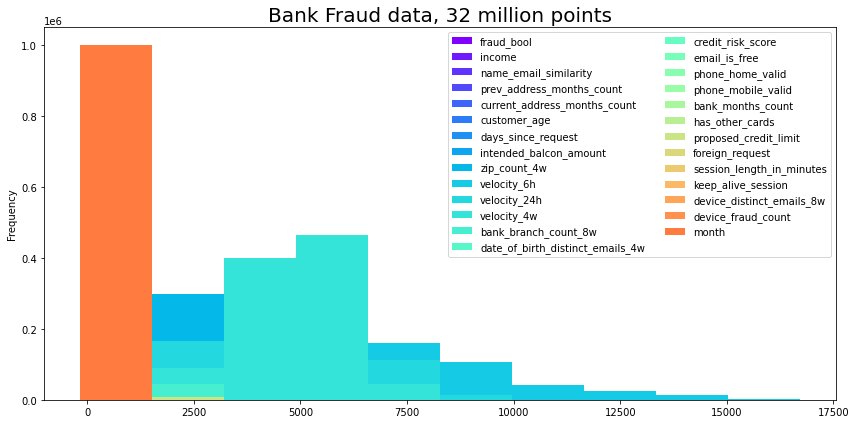

In [65]:
pluto.draw_tabular_histogram(pluto.df_bank_data,
  title='Bank Fraud data, 32 million points')

In [66]:
pluto.fname_id

18

## View categorical type 

- not continuous int or float numbers 

In [18]:
pluto.df_bank_data.payment_type.unique()

array(['AA', 'AB', 'AC', 'AD', 'AE'], dtype=object)

In [19]:
pluto.df_bank_data.employment_status.unique()

array(['CA', 'CB', 'CC', 'CD', 'CE', 'CF', 'CG'], dtype=object)

In [20]:
pluto.df_bank_data.housing_status.unique()

array(['BA', 'BB', 'BC', 'BD', 'BE', 'BF', 'BG'], dtype=object)

In [21]:
pluto.df_bank_data.source.unique()

array(['INTERNET', 'TELEAPP'], dtype=object)

In [22]:
pluto.df_bank_data.device_os.unique()

array(['windows', 'other', 'linux', 'macintosh', 'x11'], dtype=object)

## Tokenzie - Convert Categorical into continuous columns

In [67]:
# %%writefile -a {pluto_chapter_9}

@add_method(PacktDataAug)
def _fetch_token_index(self, val, xarr):
  for i, x in enumerate(xarr):
    if (val == x):
      return i
#
@add_method(PacktDataAug)
def add_token_index(self,df, df_colname):
  for cname in df_colname:
    tname = cname + "_tokenize"
    arrname = numpy.array(df[cname].unique())
    df[tname] = df[cname].apply(self._fetch_token_index, args=(arrname,))
  return

In [68]:
pluto.df_bank_tokenize_data = pluto.df_bank_data.copy()
pluto.add_token_index(pluto.df_bank_tokenize_data, 
  ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'])

In [69]:
pluto.df_bank_tokenize_data[['payment_type', 'payment_type_tokenize']].head(10)

,payment_type,payment_type_tokenize
0,AA,0
1,AB,1
2,AC,2
3,AB,1
4,AB,1
5,AD,3
6,AB,1
7,AB,1
8,AB,1
9,AB,1


In [70]:
pluto.df_bank_tokenize_data[['device_os', 'device_os_tokenize']].head(10)

,device_os,device_os_tokenize
0,windows,0
1,windows,0
2,other,1
3,linux,2
4,macintosh,3
5,windows,0
6,windows,0
7,linux,2
8,windows,0
9,windows,0


In [71]:
pluto.df_bank_tokenize_data = pluto.df_bank_tokenize_data.drop(
  ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'], axis=1)
pluto.df_bank_tokenize_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 32 columns):
 #   Column                            Non-Null Count    Dtype  
---  ------                            --------------    -----  
 0   fraud_bool                        1000000 non-null  int64  
 1   income                            1000000 non-null  float64
 2   name_email_similarity             1000000 non-null  float64
 3   prev_address_months_count         1000000 non-null  int64  
 4   current_address_months_count      1000000 non-null  int64  
 5   customer_age                      1000000 non-null  int64  
 6   days_since_request                1000000 non-null  float64
 7   intended_balcon_amount            1000000 non-null  float64
 8   zip_count_4w                      1000000 non-null  int64  
 9   velocity_6h                       1000000 non-null  float64
 10  velocity_24h                      1000000 non-null  float64
 11  velocity_4w                       1000

## checksum

In [74]:
# %%writefile -a {pluto_chapter_9}

@add_method(PacktDataAug)
def _fetch_checksum(self, df):
  df['checksum'] = df.apply(
  lambda x: numpy.mean(tuple(x)), axis=1)
  return

In [73]:
%%time
pluto._fetch_checksum(pluto.df_bank_tokenize_data)

CPU times: user 26.9 s, sys: 107 ms, total: 27 s
Wall time: 27.1 s


## (Optional) plain plot

- Uncoment when use

In [1]:
# %%time
# canvas, pic = matplotlib.pyplot.subplots(1, 1, figsize=(12, 6))
# pluto.df_bank_tokenize_data.checksum.plot(ax=pic)
# #
# pic.set_title("Quick look the checksum, 1 Million points")
# canvas.tight_layout()
# pluto._drop_image(canvas)
# canvas.show()

## heatmap

In [75]:
# %%writefile -a {pluto_chapter_9}

@add_method(PacktDataAug)
def draw_tabular_heatmap(self, df, x='checksum', y='month'):
  canvas, pic = matplotlib.pyplot.subplots(figsize=(12,6))
  df.plot.hexbin(x=x, y=y, gridsize=20, ax=pic,cmap='Reds')
  pic.set_title(f'Heatmap of {x} and {y}', fontsize=22.0)
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  return

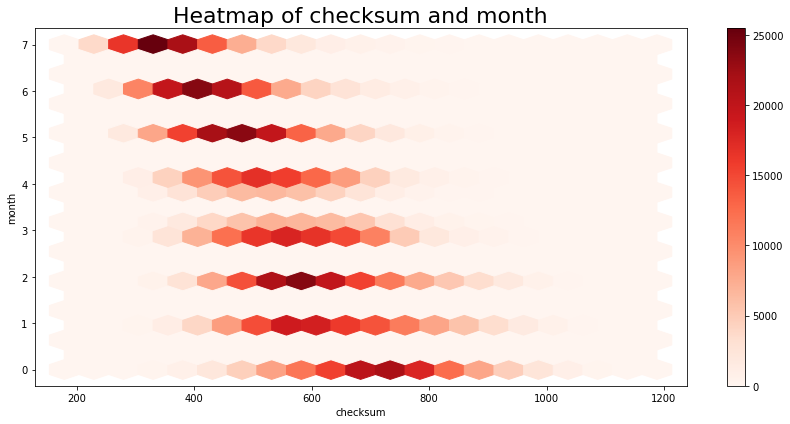

In [76]:
pluto.draw_tabular_heatmap(pluto.df_bank_tokenize_data, x='checksum', y='month')

In [77]:
pluto.fname_id

19

In [84]:
pluto.df_bank_fraud_data = pluto.df_bank_tokenize_data[pluto.df_bank_tokenize_data.fraud_bool == 1]
pluto.df_bank_fraud_data.reset_index(drop=True,inplace=True)

In [85]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 27 entries, fraud_bool to month
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   count   27 non-null     float64
 1   mean    27 non-null     float64
 2   std     27 non-null     float64
 3   min     27 non-null     float64
 4   25%     27 non-null     float64
 5   50%     27 non-null     float64
 6   75%     27 non-null     float64
 7   max     27 non-null     float64
dtypes: float64(8)
memory usage: 2.9+ KB


In [86]:
pluto.df_bank_fraud_data.describe()

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,zip_count_4w,velocity_6h,...,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month,payment_type_tokenize,employment_status_tokenize,housing_status_tokenize,source_tokenize,device_os_tokenize,checksum
count,11029.0,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,...,11029.000000,11029.000000,11029.0,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000,11029.000000
mean,1.0,0.686635,0.393161,5.861365,114.801161,40.858645,1.054615,3.962009,1622.311542,5183.913444,...,0.341645,1.079427,0.0,3.565962,1.491432,0.344184,0.833348,0.010155,0.723910,547.681591
std,0.0,0.265579,0.295607,32.816956,85.324351,13.086334,5.707977,16.622067,1005.687071,2902.298679,...,0.474283,0.320447,0.0,2.312055,0.855037,0.824645,1.151307,0.100264,1.004086,148.007727
min,1.0,0.100000,0.000132,-1.000000,-1.000000,10.000000,0.000001,-8.249792,18.000000,64.422571,...,0.000000,-1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,195.522797
25%,1.0,0.600000,0.134257,-1.000000,53.000000,30.000000,0.005911,-1.195618,909.000000,2894.349366,...,0.000000,1.000000,0.0,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,438.532069
50%,1.0,0.800000,0.292420,-1.000000,94.000000,40.000000,0.013094,-0.900578,1328.000000,4916.464728,...,0.000000,1.000000,0.0,4.000000,1.000000,0.000000,0.000000,0.000000,0.000000,538.130245
75%,1.0,0.900000,0.676543,-1.000000,156.000000,50.000000,0.023265,-0.562268,2050.000000,7128.603281,...,1.000000,1.000000,0.0,6.000000,2.000000,0.000000,2.000000,0.000000,1.000000,647.504184
max,1.0,0.900000,0.999953,357.000000,392.000000,90.000000,75.495921,111.321272,6368.000000,16084.617170,...,1.000000,2.000000,0.0,7.000000,4.000000,6.000000,6.000000,1.000000,4.000000,1132.119204


In [89]:
import seaborn

## (Optional) Seaborn heatmap, Swarmplot, and Tricolor

CPU times: user 894 ms, sys: 227 ms, total: 1.12 s
Wall time: 907 ms


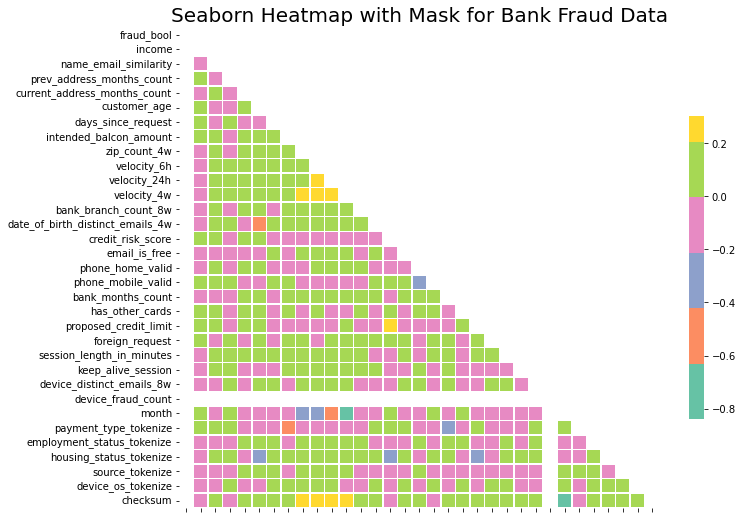

In [95]:
%%time
# Compute the correlation matrix
corr = pluto.df_bank_fraud_data.corr()

# Generate a mask for the upper triangle
mask = numpy.triu(numpy.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
canvas, pic = matplotlib.pyplot.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = seaborn.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
seaborn.heatmap(corr, mask=mask, cmap='Set2', vmax=.3, center=0,
  square=True, linewidths=.5, cbar_kws={"shrink": .5},
  ax=pic)
#
pic.set_xticklabels([])
pic.set_title("Seaborn Heatmap with Mask for Bank Fraud Data",fontsize=20.0)
canvas.tight_layout()
pluto._drop_image(canvas)
canvas.show()

/usr/local/lib/python3.8/dist-packages/seaborn/categorical.py:1296: UserWarning: 8.7% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


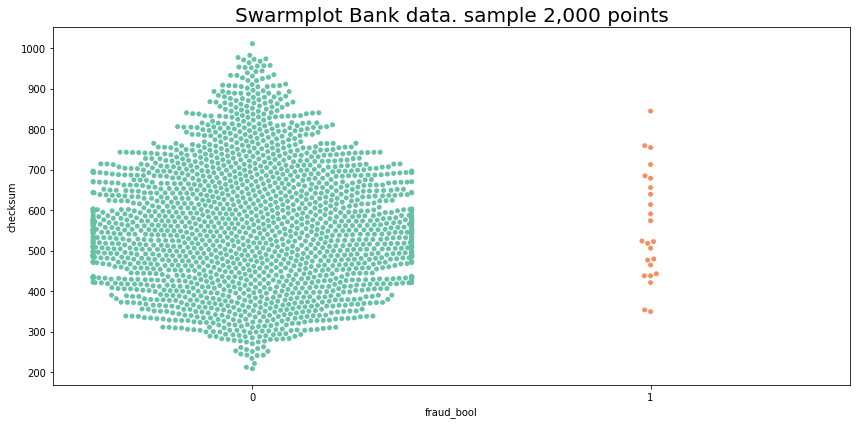

In [91]:
# sns.jointplot(x=x, y=y, kind="hex", color="#4CB391")
canvas, pic = matplotlib.pyplot.subplots(figsize=(12,6))
seaborn.swarmplot(data=pluto.df_bank_tokenize_data.sample(2000),
  x='fraud_bool', 
  y='checksum', 
  palette="Set2",
  ax=pic)
pic.set_title("Swarmplot Bank data. sample 2,000 points", fontsize=20.0)
canvas.tight_layout()
pluto._drop_image(canvas)
canvas.show()

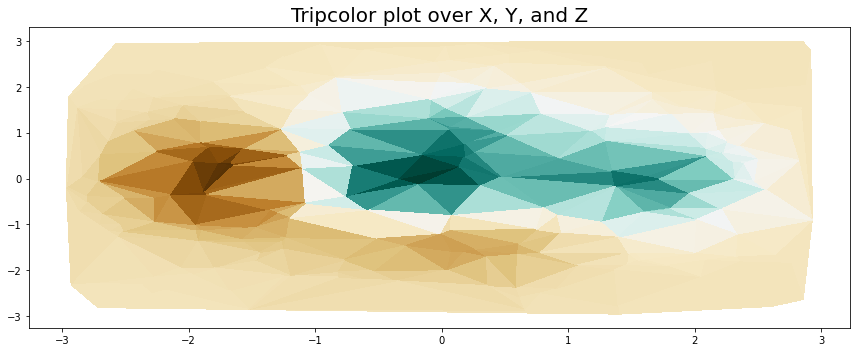

In [97]:

# plt.style.use('_mpl-gallery-nogrid')

# make data:
# numpy.random.seed(1)
x = numpy.random.uniform(-3, 3, 256)
y = numpy.random.uniform(-3, 3, 256)
# x = pluto.df_world_tokenize_data.winning_team_tokenize
# y = pluto.df_world_tokenize_data.losing_team_tokenize
z = (1 - x/2 + x**5 + y**3) * numpy.exp(-x**2 - y**2)

# plot:
canvas, pic = matplotlib.pyplot.subplots(figsize=(12,5))

# ax.plot(x, y, 'o', markersize=2, color='grey')
pic.tripcolor(x, y, z, cmap='BrBG')

# ax.set(xlim=(-3, 3), ylim=(-3, 3))
pic.set_title("Tripcolor plot over X, Y, and Z", fontsize=20.0)
canvas.tight_layout()
pluto._drop_image(canvas)
canvas.show()

## (Optional) Load Varient 1 

In [49]:
# remove white space in directory and filename
# run this until no error/output
f = 'kaggle/bank-account-fraud-dataset-neurips-2022'
#!find {f} -name "* *" -type d | rename 's/ /_/g'
!find {f} -name "* *" -type f | rename 's/ /_/g'

In [50]:
f = '/content/kaggle/bank-account-fraud-dataset-neurips-2022/Variant_I.csv'
pluto.df_bank_v1_data = pluto.fetch_df(f)
pluto.df_bank_v1_data.head(3)

,fraud_bool,income,name_email_similarity,prev_address_months_count,current_address_months_count,customer_age,days_since_request,intended_balcon_amount,payment_type,zip_count_4w,...,has_other_cards,proposed_credit_limit,foreign_request,source,session_length_in_minutes,device_os,keep_alive_session,device_distinct_emails_8w,device_fraud_count,month
0,0,0.6,0.252681,-1,188,20,0.021614,-0.266603,AC,2596,...,0,1000.0,1,INTERNET,7.634858,linux,0,1,0,5
1,0,0.9,0.185206,-1,51,30,0.001696,-1.191015,AD,898,...,0,1500.0,0,INTERNET,5.408299,other,0,1,0,4
2,0,0.1,0.505509,-1,187,20,0.011880,-1.252679,AB,2851,...,0,500.0,0,INTERNET,9.401087,linux,1,1,0,5


In [51]:
%%time
pluto.df_bank_v1_tokenize_data = pluto.df_bank_v1_data.copy()
pluto.add_token_index(pluto.df_bank_v1_tokenize_data, 
  ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'])
pluto.df_bank_v1_tokenize_data = pluto.df_bank_v1_tokenize_data.drop(
  ['payment_type', 'employment_status', 'housing_status', 'source', 'device_os'], 
  axis=1)
pluto._fetch_checksum(pluto.df_bank_v1_tokenize_data)

CPU times: user 31.7 s, sys: 137 ms, total: 31.8 s
Wall time: 32.7 s


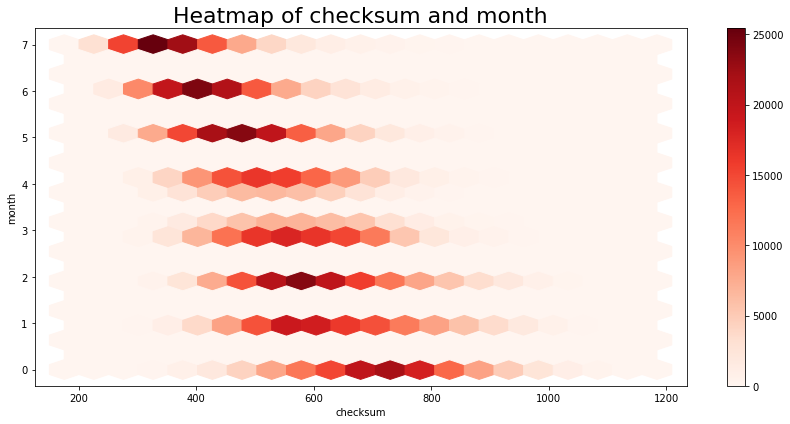

In [52]:
pluto.draw_tabular_heatmap(pluto.df_bank_v1_tokenize_data, x='checksum')

In [53]:
# fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
# pluto.df_bank_v1_tokenize_data['fraud_bool'].plot.hist(ax=ax, histtype='bar')
# fig.show()

In [54]:
# # Compute the correlation matrix
# corr = pluto.df_bank_v1_tokenize_data.corr()

# # Generate a mask for the upper triangle
# mask = numpy.triu(numpy.ones_like(corr, dtype=bool))

# # Set up the matplotlib figure
# fig, ax = matplotlib.pyplot.subplots(figsize=(11, 9))

# # Generate a custom diverging colormap
# cmap = seaborn.diverging_palette(230, 20, as_cmap=True)

# # Draw the heatmap with the mask and correct aspect ratio
# seaborn.heatmap(corr, mask=mask, cmap='Set2', vmax=.3, center=0,
#   square=True, linewidths=.5, cbar_kws={"shrink": .5},
#   ax=ax)
# #
# ax.set_xticklabels([])
# fig.show()

In [55]:
# pluto.df_bank_v1_tokenize_data.device_fraud_count.unique()

In [56]:
# pluto.df_bank_v1_tokenize_data.device_fraud_count.unique()

In [57]:
# fig, ax = matplotlib.pyplot.subplots(figsize=(12,6))
# seaborn.swarmplot(data=pluto.df_bank_v1_tokenize_data.sample(2000),
#   x='fraud_bool', 
#   y='checksum', 
#   palette="Set2",
#   ax=ax)
# fig.show()

# World Series Baseball Television Ratings

In [100]:
%%time
f = 'https://www.kaggle.com/datasets/mattop/world-series-baseball-television-ratings'
pluto.fetch_kaggle_dataset(f)

100%|██████████| 2.20k/2.20k [00:00<00:00, 820kB/s]


CPU times: user 49.7 ms, sys: 8.12 ms, total: 57.8 ms
Wall time: 545 ms


In [101]:
f = '/content/kaggle/world-series-baseball-television-ratings/world-series-ratings.csv'
pluto.df_world_data = pluto.fetch_df(f)
pluto.df_world_data.head(3)

,year,network,average_audience,game_1_audience,game_2_audience,game_3_audience,game_4_audience,game_5_audience,game_6_audience,game_7_audience,total_games_played,winning_team,losing_team,losing_team_wins
0,2022,Fox,11762000,11475000.0,10789000.0,11162000.0,11809000.0,12786000.0,12549000.0,NaN,6,Houston Astros,Philadelphia Phillies,2
1,2021,Fox,11744000,10811000.0,10280000.0,11232000.0,10511000.0,13644000.0,13986000.0,NaN,6,Atlanta Braves,Houston Astros,2
2,2020,Fox,9785000,9195000.0,8950000.0,8156000.0,9332000.0,10059000.0,12627000.0,NaN,6,Los Angeles Dodgers,Tampa Bay Rays,2


In [102]:
pluto.df_world_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   year                54 non-null     int64  
 1   network             54 non-null     object 
 2   average_audience    54 non-null     int64  
 3   game_1_audience     53 non-null     float64
 4   game_2_audience     52 non-null     float64
 5   game_3_audience     53 non-null     float64
 6   game_4_audience     53 non-null     float64
 7   game_5_audience     44 non-null     float64
 8   game_6_audience     31 non-null     float64
 9   game_7_audience     18 non-null     float64
 10  total_games_played  54 non-null     int64  
 11  winning_team        54 non-null     object 
 12  losing_team         54 non-null     object 
 13  losing_team_wins    54 non-null     int64  
dtypes: float64(7), int64(4), object(3)
memory usage: 6.0+ KB


In [103]:
pluto.df_world_data.nunique()

year                  53
network                4
average_audience      53
game_1_audience       53
game_2_audience       52
game_3_audience       51
game_4_audience       53
game_5_audience       44
game_6_audience       31
game_7_audience       18
total_games_played     4
winning_team          23
losing_team           22
losing_team_wins       4
dtype: int64

In [104]:
%%time
pluto.df_world_tokenize_data = pluto.df_world_data.copy()
pluto.df_world_tokenize_data = pluto.df_world_tokenize_data.fillna(0)
pluto.add_token_index(pluto.df_world_tokenize_data, 
  ['network', 'winning_team', 'losing_team'])
pluto.df_world_tokenize_data = pluto.df_world_tokenize_data.drop(
  ['network', 'winning_team', 'losing_team'], 
  axis=1)
pluto._fetch_checksum(pluto.df_world_tokenize_data)


CPU times: user 11.7 ms, sys: 0 ns, total: 11.7 ms
Wall time: 20 ms


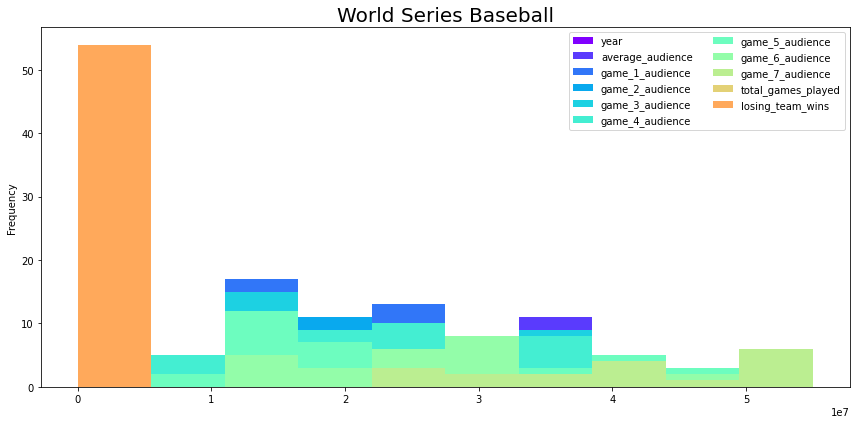

In [105]:
pluto.draw_tabular_histogram(pluto.df_world_data,
  title='World Series Baseball',
  maxcolors=14)

In [109]:
pluto.fname_id

26

In [106]:
pluto.df_world_tokenize_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54 entries, 0 to 53
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   year                   54 non-null     int64  
 1   average_audience       54 non-null     int64  
 2   game_1_audience        54 non-null     float64
 3   game_2_audience        54 non-null     float64
 4   game_3_audience        54 non-null     float64
 5   game_4_audience        54 non-null     float64
 6   game_5_audience        54 non-null     float64
 7   game_6_audience        54 non-null     float64
 8   game_7_audience        54 non-null     float64
 9   total_games_played     54 non-null     int64  
 10  losing_team_wins       54 non-null     int64  
 11  network_tokenize       54 non-null     int64  
 12  winning_team_tokenize  54 non-null     int64  
 13  losing_team_tokenize   54 non-null     int64  
 14  checksum               54 non-null     float64
dtypes: float

In [107]:
!pip install joypy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [117]:
# %%writefile -a {pluto_chapter_9}

import joypy
#
@add_method(PacktDataAug)
def draw_tabular_joyplot(self, df, x=[], y='network', t='',legloc='upper left'):
  canvas, pics = joypy.joyplot(df, 
    column=x, 
    by=y, 
    ylim='own', figsize=(12,6),
    overlap=1)

  # Decoration
  matplotlib.pyplot.title(t, fontsize=22)
  pics[0].legend(ncol=2, loc=legloc)
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  return

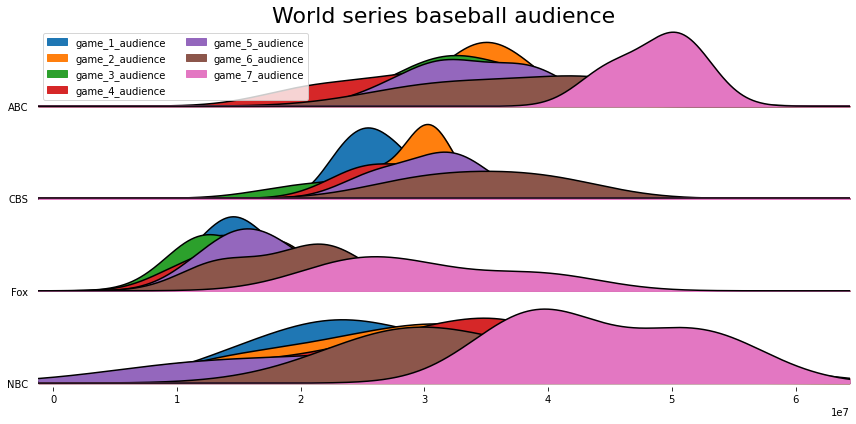

In [114]:
pluto.draw_tabular_joyplot(pluto.df_world_data, 
  x=['game_1_audience', 'game_2_audience', 'game_3_audience',
     'game_4_audience', 'game_5_audience', 'game_6_audience', 
     'game_7_audience'],
  y='network',
  t='World series baseball audience')

In [115]:
pluto.fname_id

29

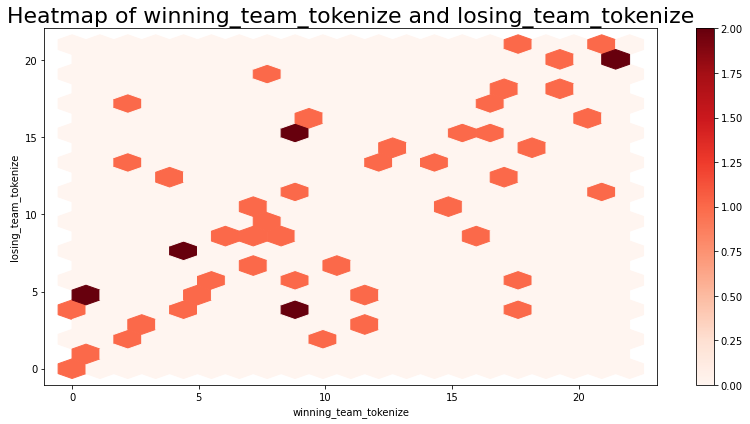

In [73]:
pluto.draw_tabular_heatmap(pluto.df_world_tokenize_data,x='winning_team_tokenize',y='losing_team_tokenize')

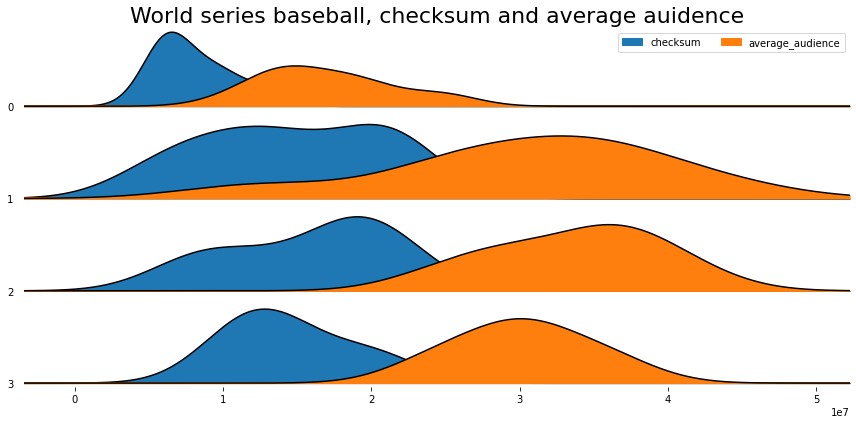

In [118]:
pluto.draw_tabular_joyplot(pluto.df_world_tokenize_data, 
  x=['checksum', 'average_audience'],
  y='network_tokenize',
  t='World series baseball, checksum and average auidence',
  legloc='upper right')

In [119]:
pluto.fname_id

31

In [121]:
! pip install pywaffle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 25.1/25.1 MB 53.0 MB/s eta 0:00:00


In [171]:
# %%writefile -a {pluto_chapter_9}

import pywaffle
#
@add_method(PacktDataAug)
def draw_tabular_waffle(self, df_orig, col='winning_team', 
  title='',legloc='lower center', anchor=(0.5, -0.5)):
  df = df_orig.groupby(col).size().reset_index(name='counts')
  cat = df.shape[0]
  colors = [matplotlib.pyplot.cm.nipy_spectral(i/float(cat)) for i in range(cat)]

  # Draw Plot and Decorate
  canvas = matplotlib.pyplot.figure(
    FigureClass=pywaffle.Waffle,
    plots={
      '111': {
        'values': df['counts'],
        'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[[col, 'counts']].itertuples()],
        'legend': {'loc': legloc, 'fontsize': 11, 'ncol': 4, 'bbox_to_anchor':anchor},
        'title': {'label': title, 'loc': 'center', 'fontsize':20.0}},},
      rows=4,
      colors=colors,
      figsize=(12, 10))
  #
  canvas.tight_layout()
  self._drop_image(canvas)
  canvas.show()
  return
# pics[0].legend(ncol=2, loc=legloc) 'bbox_to_anchor': (1.05, 1),

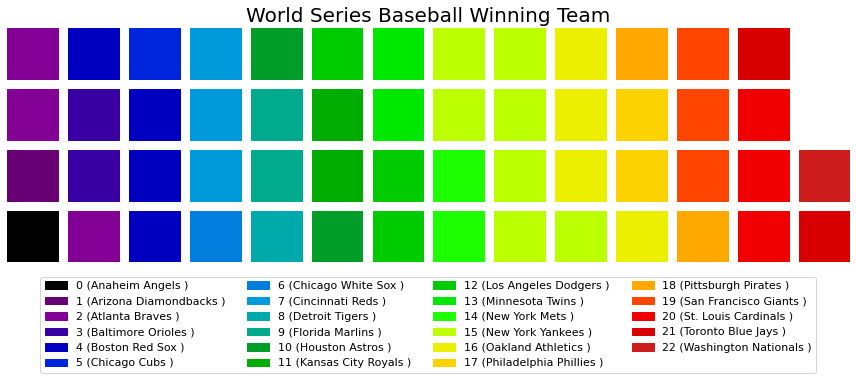

In [175]:
pluto.draw_tabular_waffle(pluto.df_world_data, 
  col='winning_team',
  title='World Series Baseball Winning Team')

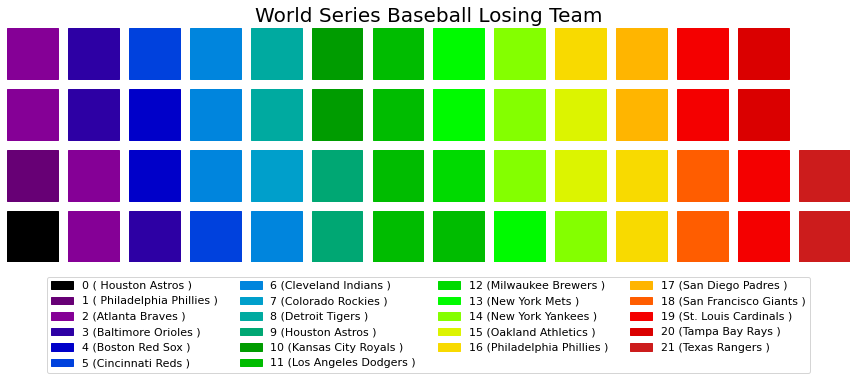

In [164]:
pluto.draw_tabular_waffle(pluto.df_world_data, 
  col='losing_team',
  title='World Series Baseball Losing Team')

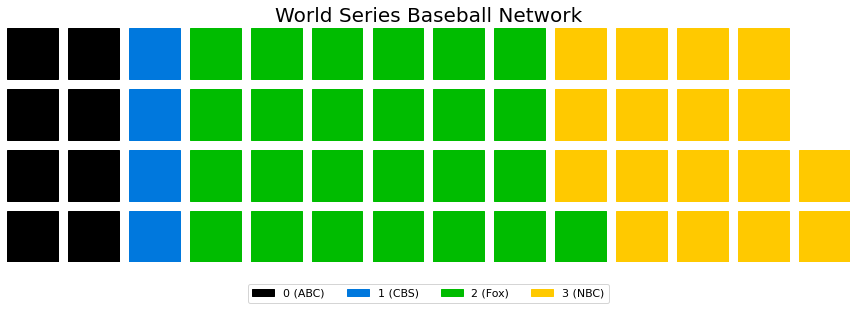

In [173]:

pluto.draw_tabular_waffle(pluto.df_world_data, 
  col='network',
  title='World Series Baseball Network',
  anchor=(0.5, -0.2))

In [174]:
pluto.fname_id

40

# Augmentation

# Push up all changes (Optional)

- username: duchaba

- password: [use the token]

In [ ]:
# import os
# f = 'Data-Augmentation-with-Python'
# os.chdir(f)
# !git add -A
# !git config --global user.email "duc.haba@gmail.com"
# !git config --global user.name "duchaba"
# !git commit -m "end of session"
# # do the git push in the xterm console
# #!git push

In [ ]:
# %%script false --no-raise-error  #temporary stop execute for export file

# Summary 

Every chaper will begin with same base class "PacktDataAug".

✋ FAIR WARNING:

- The coding uses long and complete function path name.

- Pluto wrote the code for easy to understand and not for compactness, fast execution, nor cleaverness.

- Use Xterm to debug cloud server



In [ ]:
# !pip install colab-xterm
# %load_ext colabxterm
# %xterm